In [2]:
import cv2
import matplotlib.pyplot as plt

https://www.kaggle.com/code/zeeshanlatif/image-processing-basics-with-opencv-for-beginners/comments

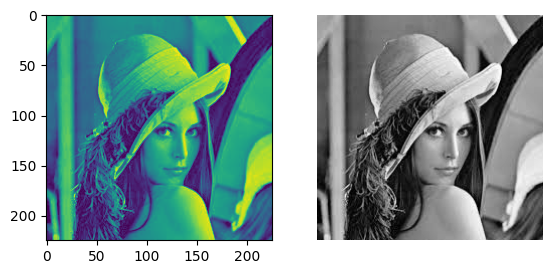

In [5]:
# Read the image using OpenCV
image = cv2.imread('/content/girl.jpeg')

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image using matplotlib
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(image_rgb,cmap='gray')#for colr
cv2.imwrite('log_transformed.jpg', image_rgb)

plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Reading image as gray scale.
cb_img = cv2.imread("/content/Cameraman.jfif", cv2.IMREAD_GRAYSCALE)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[209 210 210 ... 208 208 207]
 [152 152 153 ... 150 150 150]
 [155 155 156 ... 153 152 152]
 ...
 [118 119 122 ... 140 138 123]
 [118 133 157 ... 119 120 117]
 [191 199 203 ... 198 193 188]]


In [ ]:
# Displaying the image attributes
print("Shape of the image: ", cb_img.shape)
print("Data type of the image: ", cb_img.dtype)
print("Size of the image: ", cb_img.size)

Shape of the image:  (225, 224)
Data type of the image:  uint8
Size of the image:  50400


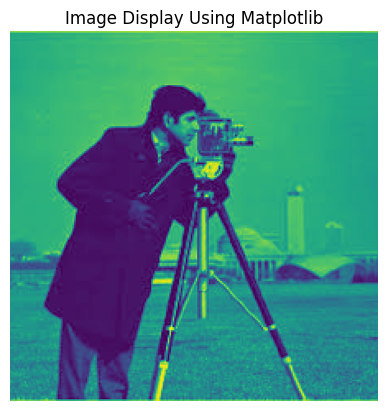

In [ ]:
# Displaying image using Matplotlib.
plt.imshow(cb_img)
plt.title("Image Display Using Matplotlib")
plt.axis("off") # To turn off axes
plt.show()

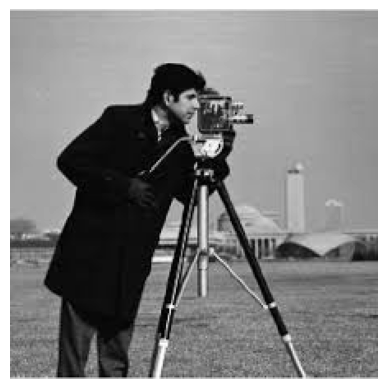

In [ ]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap = "gray")
plt.axis("off")
plt.show()

In [ ]:
 #Reading the image
avacado_img = cv2.imread("/content/avacado.jfif", cv2.IMREAD_COLOR)

# Printing the shape of the image
print("Image shape (height, width, channels) is:", avacado_img.shape)

# Printing the size of the image
print("Image size is: ", avacado_img.size)

# Printing the data-type of the image
print("Data type of image is:", avacado_img.dtype)

Image shape (height, width, channels) is: (204, 247, 3)
Image size is:  151164
Data type of image is: uint8


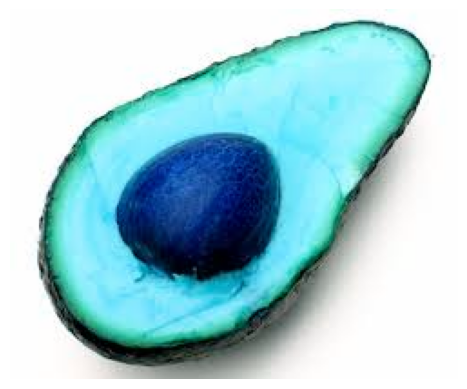

In [ ]:
# Displaying the image using matplotlib
plt.imshow(avacado_img)
plt.axis("off")
plt.show()

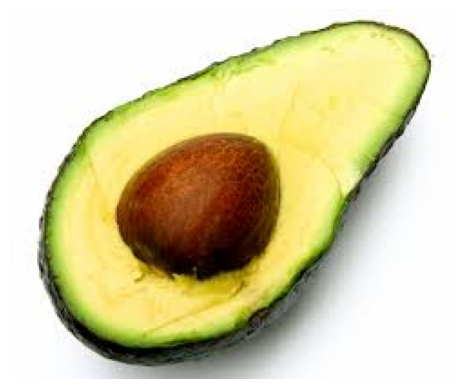

In [ ]:
# Reversing the channels of the color image
avacado_img_channels_reversed = avacado_img[:, :, ::-1]
plt.imshow(avacado_img_channels_reversed)
plt.axis("off")
plt.show()

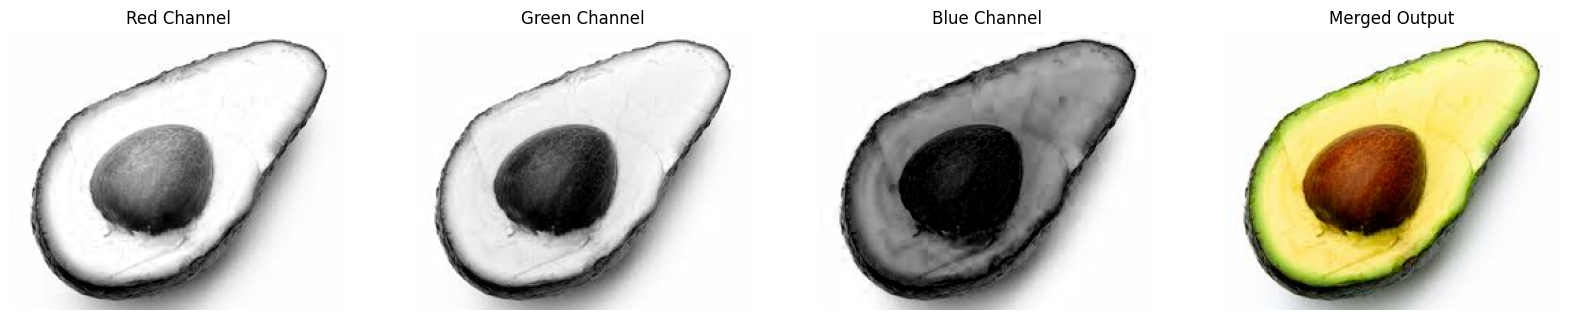

In [ ]:
# Split the image into the B,G,R components
b, g, r = cv2.split(avacado_img)

# Show the channels
plt.figure(figsize = [20, 5])

# Red Channel
plt.subplot(1, 4, 1)
plt.imshow(r, cmap = "gray")
plt.title("Red Channel")
plt.axis("off")

# Green Channel
plt.subplot(1, 4, 2)
plt.imshow(g, cmap = "gray")
plt.title("Green Channel")
plt.axis("off")

# Blue Channel
plt.subplot(1, 4, 3)
plt.imshow(b, cmap = "gray")
plt.title("Blue Channel")
plt.axis("off")

# Merge the individual channels into a BGR image
merged_img = cv2.merge((b, g, r))

# Show the merged output
plt.subplot(1, 4, 4)
plt.imshow(merged_img[:, :, ::-1])
plt.title("Merged Output")
plt.axis("off")
plt.show()

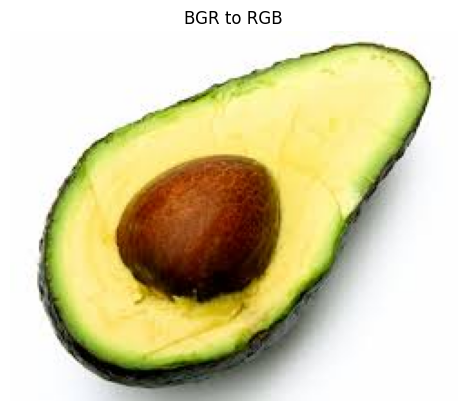

In [ ]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
avacado_img_bgr = cv2.imread("/content/avacado.jfif", cv2.IMREAD_COLOR)

# Converting BGR to RGB
avacado_img_rgb = cv2.cvtColor(avacado_img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(avacado_img_rgb)
plt.title("BGR to RGB")
plt.axis("off")
plt.show()

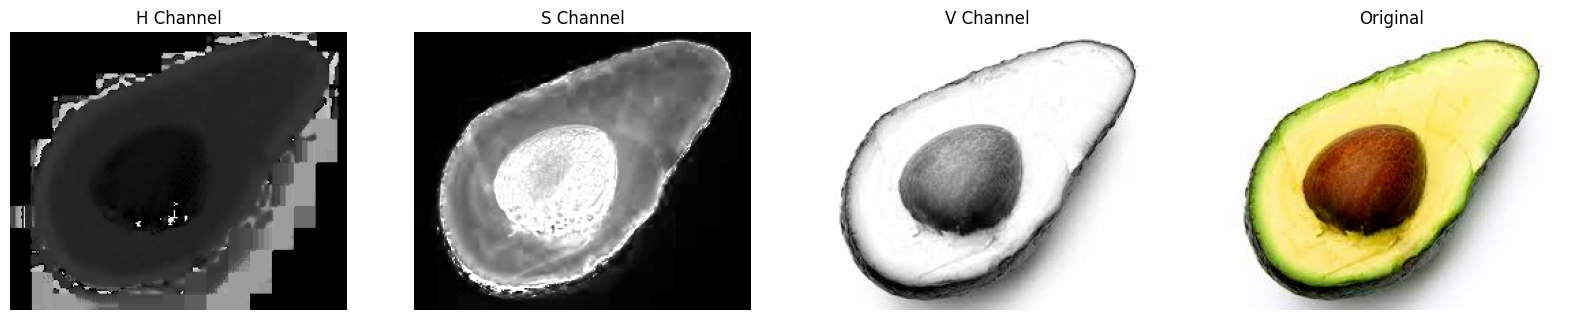

In [ ]:
# Converting to HSV
avacado_img_hsv = cv2.cvtColor(avacado_img_bgr, cv2.COLOR_BGR2HSV)

# Split the image into H, S, V components
h, s, v = cv2.split(avacado_img_hsv)

# Show the channels
plt.figure(figsize = [20, 5])

# Hue Channel
plt.subplot(1, 4, 1)
plt.imshow(h, cmap = "gray")
plt.title("H Channel")
plt.axis("off")

# Saturation Channel
plt.subplot(1, 4, 2)
plt.imshow(s, cmap = "gray")
plt.title("S Channel")
plt.axis("off")

# Value Channel
plt.subplot(1, 4, 3)
plt.imshow(v, cmap = "gray")
plt.title("V Channel")
plt.axis("off")

# Show the original image
plt.subplot(1, 4, 4)
plt.imshow(avacado_img_rgb)
plt.title("Original")
plt.axis("off")
plt.show()

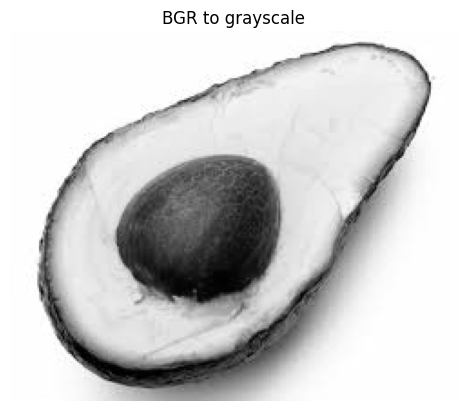

In [ ]:
# Converting BGR to grayscale
avacado_img_gray = cv2.cvtColor(avacado_img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(avacado_img_gray, cmap = "gray")
plt.title("BGR to grayscale")
plt.axis("off")
plt.show()


In [ ]:
# Saving the image
cv2.imwrite("avacado_saved.jpg", avacado_img_rgb)

True

In [ ]:
# Import required modules
import cv2
import numpy as np
import os
import glob
from google.colab.patches import cv2_imshow

# Define the dimensions of checkerboard
CHECKERBOARD = (10, 7)


# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
			cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


# 3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
					* CHECKERBOARD[1],
					3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
							0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None


# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
images = glob.glob('/content/*.jpg')

for filename in images:
	image = cv2.imread(filename)
	grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# Find the chess board corners
	# If desired number of corners are
	# found in the image then ret = true
	ret, corners = cv2.findChessboardCorners(
					grayColor, CHECKERBOARD,
					cv2.CALIB_CB_ADAPTIVE_THRESH
					+ cv2.CALIB_CB_FAST_CHECK +
					cv2.CALIB_CB_NORMALIZE_IMAGE)

	# If desired number of corners can be detected then,
	# refine the pixel coordinates and display
	# them on the images of checker board
	if ret == True:
		threedpoints.append(objectp3d)

		# Refining pixel coordinates
		# for given 2d points.
		corners2 = cv2.cornerSubPix(
			grayColor, corners, (11, 11), (-1, -1), criteria)

		twodpoints.append(corners2)

		# Draw and display the corners
		image = cv2.drawChessboardCorners(image,
										CHECKERBOARD,
										corners2, ret)

	cv2_imshow(image)
	cv2.waitKey(0)

cv2.destroyAllWindows()

h, w = image.shape[:2]


# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
	threedpoints, twodpoints, grayColor.shape[::-1], None, None)


# Displaying required output
print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)


 Camera matrix:
[[3.02713482e+03 0.00000000e+00 2.03524083e+03]
 [0.00000000e+00 3.02779565e+03 1.47234601e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[ 6.12753790e-02 -2.45608879e-01 -1.36944285e-03  3.84788037e-05
   4.25470501e-01]]

 Rotation Vectors:
(array([[-0.27825901],
       [ 0.16040039],
       [ 0.10069697]]), array([[ 0.24276694],
       [ 0.14879323],
       [-3.08166111]]), array([[-0.29579925],
       [-0.10194463],
       [-0.16470882]]), array([[-0.4816043],
       [-0.325154 ],
       [-1.5271542]]), array([[-0.02240767],
       [-0.4304927 ],
       [-0.0025043 ]]), array([[-0.49787403],
       [-0.28918766],
       [-0.4827065 ]]), array([[-0.25066539],
       [-0.24810151],
       [ 0.66166555]]), array([[ 0.02772962],
       [-0.45759713],
       [-3.09709793]]), array([[-0.20236031],
       [ 0.2732261 ],
       [ 0.28225876]]), array([[-0.35001373],
       [-0.29166003],
       [-1.08863384]]), array([[-0.23300959],
       

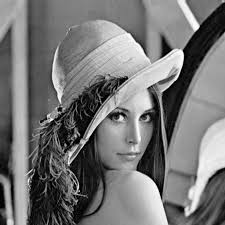

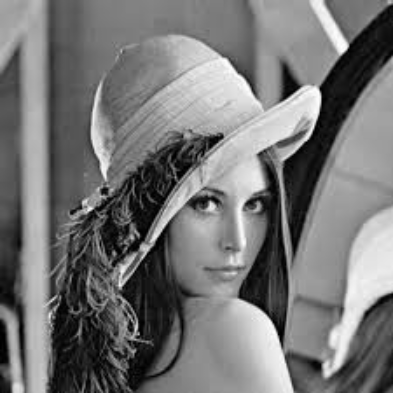

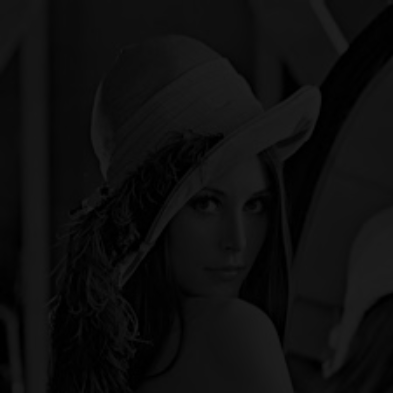

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load an image from file
image = cv2.imread('girl.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize the image to the target resolution (100 dpi in this case)
# Let's assume the image size in inches is 3.937 inches (10 cm)
dpi = 100
size_in_inches = 3.937
target_size = int(dpi * size_in_inches)

# Resize the image to the target resolution
resized_image = cv2.resize(image, (target_size, target_size))

# Reduce the bit-depth for quantization (simulate 8-bit image)
quantized_image = np.uint8(resized_image // 8)

# Display the original and processed images
cv2_imshow(image)
cv2_imshow(resized_image)
cv2_imshow(quantized_image)

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()


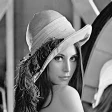

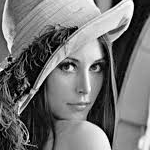

True

In [13]:

# Resize the image by a factor of 0.5
resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
# Crop the image from (50, 50) to (200, 200)
cropped_image = image[50:200, 50:200]
cv2_imshow(resized_image)
cv2_imshow(cropped_image)
# Save the results
cv2.imwrite('resized_image.jpg', resized_image)
cv2.imwrite('cropped_image.jpg', cropped_image)



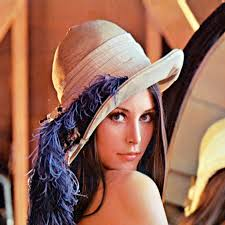

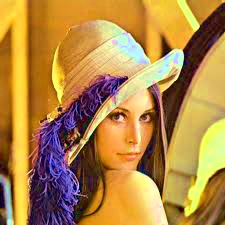

In [20]:
# Load an image from file
image = cv2.imread('girl.jpeg')

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV channels
h, s, v = cv2.split(hsv)

# Modify Hue, Saturation, and Value independently
h = cv2.add(h, 10)  # Increase hue by 10 (wraps around, so it changes color slightly)
s = cv2.add(s, 50)  # Increase saturation to make colors more vivid
v = cv2.add(v, 30)  # Increase brightness

# Merge channels back into an HSV image
modified_hsv = cv2.merge([h, s, v])

# Convert back to BGR color space
result = cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2BGR)

# Display the original and modified images
cv2_imshow(image)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


IMAGE TRANSFormATION

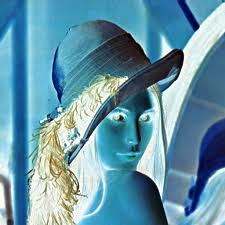

In [22]:
# Create a negative image
negative_image = 255 - image

cv2_imshow(negative_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



<ipython-input-23-cdd22c816ba9>:3: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + image)
<ipython-input-23-cdd22c816ba9>:5: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype = np.uint8)


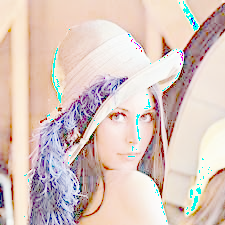

In [23]:
# Apply log transform.
c = 255/(np.log(1 + np.max(image)))
log_transformed = c * np.log(1 + image)
# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)
# Save the output.
cv2_imshow(log_transformed)


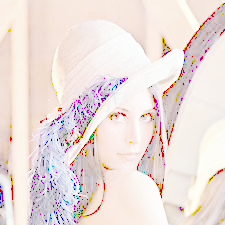

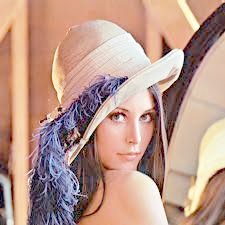

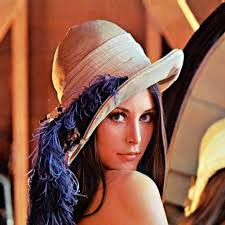

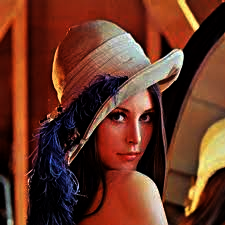

In [24]:
#Apply power law
 # Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:
     # Apply gamma correction.
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
     # Save edited images.
    cv2_imshow(gamma_corrected)
